# Boutique Sales Analysis
This notebook provides a detailed analysis of sales data for a trendy boutique.
It covers revenue, profit, and margin performance by different product types, styles, channels, and customer segments.

The goal is to help the boutique understand:
- Which sales channels are most profitable
- Which product styles and types have the highest margin
- How ad spend correlates with profit
- Monthly trends in profit and margin
- Top-performing products


## 1.Import Libraries

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load and Inspect Data
We load the sales data, check for duplicates, missing values, and ensure all numeric and date columns are properly formatted.


In [66]:
df = pd.read_csv("Data - Sheet1.csv")
df

,date,units_sold,unit_price,cost,daily_revenue,product_type,style,customer_segment,channel,ad_spend
0,2023-08-12 00:00:00,8,49.73,22.30,397.84,Dress,Sport,Premium,Online,89.68
1,2023-01-05 00:00:00,2,146.41,80.10,292.82,Jacket,Casual,Budget,Online,77.60
2,2024-02-21 00:00:00,17,82.99,44.94,1410.83,Jacket,Sport,Mid,Online,56.39
3,2024-01-13 00:00:00,12,14.07,11.40,168.84,Dress,Formal,Premium,Online,58.14
4,2024-06-09 00:00:00,7,149.54,66.89,1046.78,Dress,Sport,Premium,In-store,20.71
...,...,...,...,...,...,...,...,...,...,...
1995,2023-12-30 00:00:00,5,49.28,24.67,246.40,Dress,Casual,Premium,In-store,69.94
1996,2023-08-14 00:00:00,10,37.98,19.47,379.80,Jacket,Casual,Budget,Online,86.22
1997,2024-10-16 00:00:00,17,36.46,19.53,619.82,Pants,Casual,Budget,Online,44.83
1998,2023-09-30 00:00:00,3,90.53,36.54,271.59,Jacket,Sport,Budget,Online,93.46


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              2000 non-null   object 
 1   units_sold        2000 non-null   int64  
 2   unit_price        2000 non-null   float64
 3   cost              2000 non-null   float64
 4   daily_revenue     2000 non-null   float64
 5   product_type      2000 non-null   object 
 6   style             2000 non-null   object 
 7   customer_segment  2000 non-null   object 
 8   channel           2000 non-null   object 
 9   ad_spend          2000 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 156.4+ KB


In [68]:
df.isnull().sum().sort_values(ascending=False)

,0
date,0
units_sold,0
unit_price,0
cost,0
daily_revenue,0
product_type,0
style,0
customer_segment,0
channel,0
ad_spend,0


In [69]:
df['date'] = pd.to_datetime(df['date'])

## 3. Data Cleaning
Remove duplicates and invalid entries where unit_price <= cost or units_sold <= 0.

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df = df[df['unit_price'] > df['cost']]
df = df[df['units_sold'] > 0]

## 4. Calculated Columns
- **Profit**: Revenue minus cost
- **Margin**: Profit relative to unit price
These columns are essential to evaluate performance by channel, style, and product type.


In [72]:
df['profit'] = (df['unit_price'] - df['cost']) * df['units_sold']

In [73]:
df['margin'] = (df['unit_price'] - df['cost']) / df['unit_price']

## 5.Describe

In [74]:
df[['unit_price', 'cost', 'units_sold', 'profit', 'margin']].describe()

,unit_price,cost,units_sold,profit,margin
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,75.731765,47.062480,10.432500,299.769975,0.378118
std,42.067238,28.177711,5.797521,291.894627,0.130238
min,5.010000,2.310000,1.000000,1.220000,0.150297
25%,39.277500,23.230000,5.000000,80.115000,0.268089
50%,73.500000,44.580000,11.000000,208.500000,0.378780
75%,110.965000,66.952500,15.000000,420.420000,0.490890
max,149.960000,124.190000,20.000000,1641.800000,0.599971


## 6. Key Performance Indicators (KPIs)
 Calculate total profit, average margin, total units sold, and total ad spend.

In [85]:
total_profit = df['profit'].sum()
avg_margin = df['margin'].mean()
total_units = df['units_sold'].sum()
total_ad = df['ad_spend'].sum()

print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Margin: {avg_margin:.2%}")
print(f"Total Units Sold: {total_units}")
print(f"Total Ad Spend: ${total_ad:,.2f}")

Total Profit: $599,539.95
Average Margin: 37.81%
Total Units Sold: 20865
Total Ad Spend: $105,474.36


## 7. Margin by Channel
Which sales channel generates the highest profit margin."

In [75]:
df.groupby('channel')['margin'].mean().sort_values(ascending=False)

,margin
channel,
Online,0.382112
In-store,0.374132


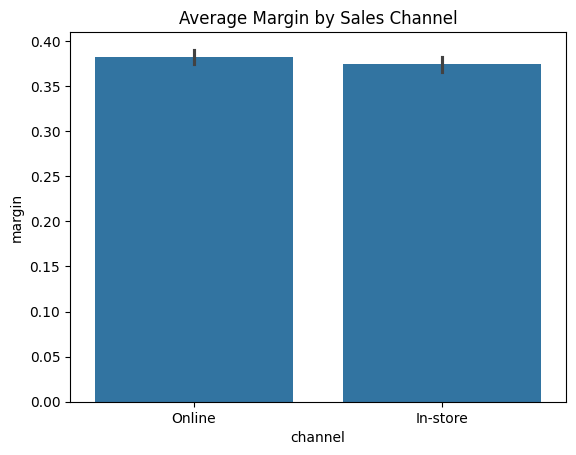

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='channel', y='margin', data=df)
plt.title("Average Margin by Sales Channel")
plt.show()

## 8. Margin by Style
Compare product styles to see which is most profitable.

In [77]:
df.groupby('style')['margin'].mean().sort_values(ascending=False)

,margin
style,
Formal,0.380504
Sport,0.377939
Casual,0.375982


## 9. Heatmap: Margin by Style and Channel
Interaction between sales channel and product style.

In [78]:
pivot = df.pivot_table(
    values='margin',
    index='style',
    columns='channel',
    aggfunc='mean'
)

pivot

channel,In-store,Online
style,,
Casual,0.377547,0.374355
Formal,0.369049,0.391513
Sport,0.375479,0.380413


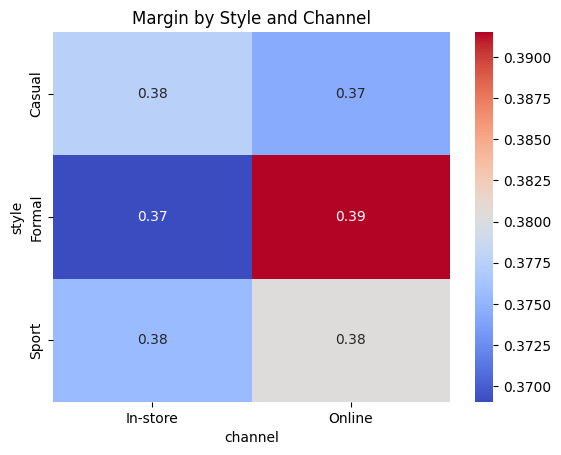

In [79]:
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Margin by Style and Channel")
plt.show()

## 10. Margin by Product Type and Customer Segment

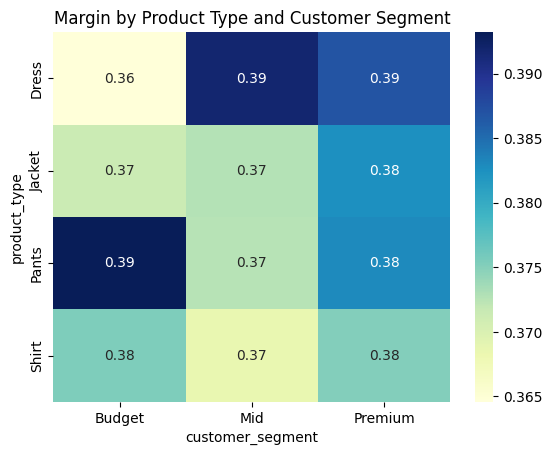

In [80]:
pivot_prod = df.pivot_table(
    values='margin',
    index='product_type',
    columns='customer_segment',
    aggfunc='mean'
)
sns.heatmap(pivot_prod, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Margin by Product Type and Customer Segment")
plt.show()

## 11.Scatter Plots
 Visualize relationships: Margin vs Unit Price & Profit vs Ad Spend"

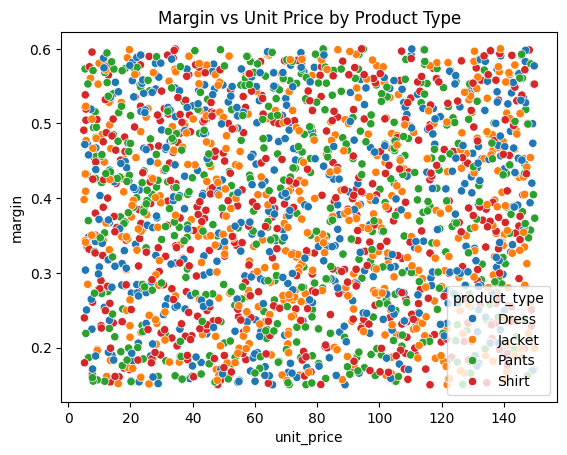

In [81]:
sns.scatterplot(x='unit_price', y='margin', hue='product_type', data=df)
plt.title("Margin vs Unit Price by Product Type")
plt.show()

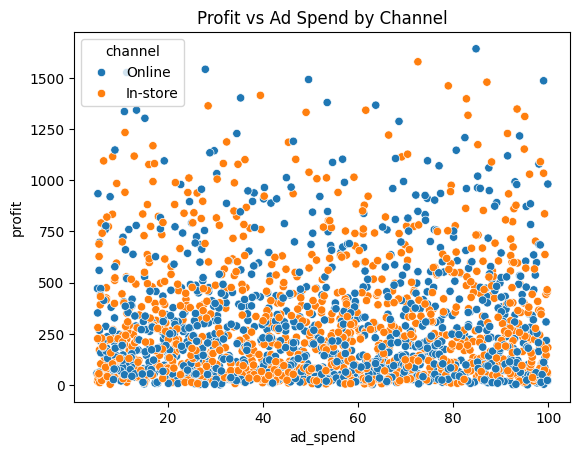

In [82]:
sns.scatterplot(x='ad_spend', y='profit', hue='channel', data=df)
plt.title("Profit vs Ad Spend by Channel")
plt.show()

## 12. Correlation Analysis
Check correlations between ad spend, profit, and margin.

In [83]:
df[['ad_spend','profit','margin']].corr()

,ad_spend,profit,margin
ad_spend,1.000000,0.013139,0.008745
profit,0.013139,1.000000,0.364797
margin,0.008745,0.364797,1.000000


## 13. Top 5 Products by Profit
Quick view of highest profit products.

In [84]:
top_products = df.groupby('product_type')['profit'].sum().sort_values(ascending=False).head(5)
print(top_products)

product_type
Jacket    160635.15
Pants     151133.89
Dress     146298.36
Shirt     141472.55
Name: profit, dtype: float64


### 14.Monthly trend of profit and margin
### Products with high margin but low sales (potential promotion)
### Channels with high ad spend but low profit (optimize marketing)

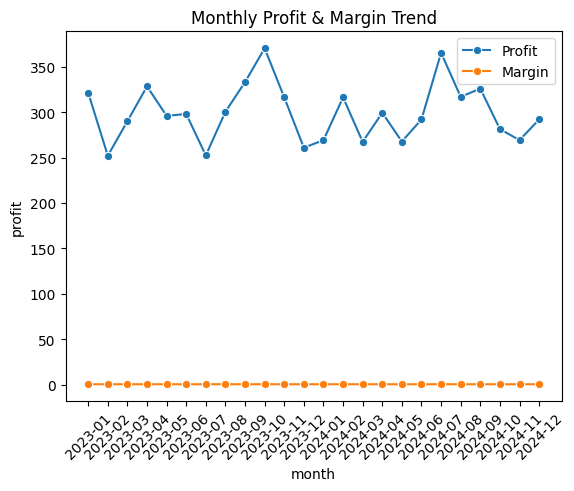

In [88]:
df['month'] = df['date'].dt.to_period('M').astype(str)
monthly = df.groupby('month')[['profit','margin']].mean().reset_index()

sns.lineplot(data=monthly, x='month', y='profit', marker='o', label='Profit')
sns.lineplot(data=monthly, x='month', y='margin', marker='o', label='Margin')
plt.xticks(rotation=45)
plt.title("Monthly Profit & Margin Trend")
plt.legend()
plt.show()

## 14. Units Sold Analysis

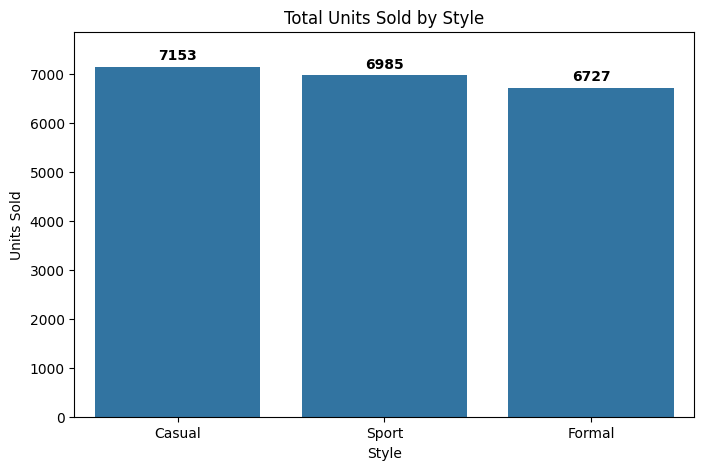

In [92]:
units_sold_style = df.groupby('style')['units_sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=units_sold_style.index, y=units_sold_style.values)
plt.title("Total Units Sold by Style")
plt.ylabel("Units Sold")
plt.xlabel("Style")

plt.ylim(0, units_sold_style.max() * 1.1)

for i, val in enumerate(units_sold_style.values):
    plt.text(i, val + units_sold_style.max()*0.02, int(val), ha='center', fontweight='bold')

plt.show()

## 15. Ad Spend Efficiency

/tmp/ipython-input-2594268710.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ad_efficiency = df.groupby('channel').apply(lambda x: x['profit'].sum()/x['ad_spend'].sum()).sort_values()


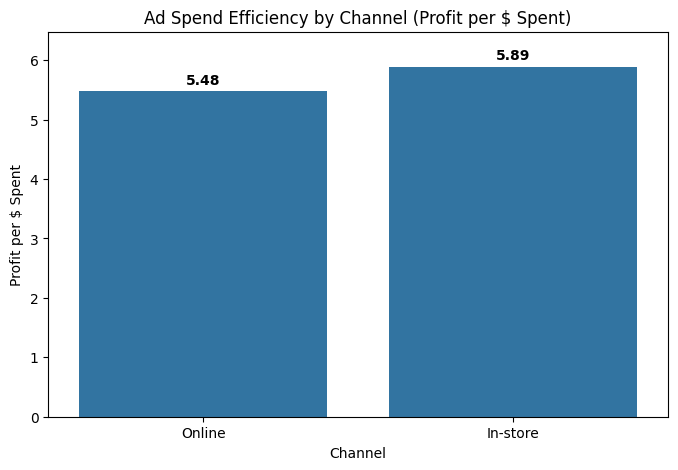

In [97]:
ad_efficiency = df.groupby('channel').apply(lambda x: x['profit'].sum()/x['ad_spend'].sum()).sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=ad_efficiency.index, y=ad_efficiency.values)
plt.title("Ad Spend Efficiency by Channel (Profit per $ Spent)")
plt.ylabel("Profit per $ Spent")
plt.xlabel("Channel")

plt.ylim(0, ad_efficiency.max() * 1.1)

for i, val in enumerate(ad_efficiency.values):
    plt.text(i, val + ad_efficiency.max()*0.02, f"{val:.2f}", ha='center', fontweight='bold')

plt.show()

## 16. Full Performance Table

In [98]:
full_table = df.groupby(['product_type','style','channel'])[['profit','margin','units_sold','ad_spend']].sum().reset_index()
full_table = full_table.sort_values(by='profit', ascending=False)
full_table.head(10)

,product_type,style,channel,profit,margin,units_sold,ad_spend
0,Dress,Casual,In-store,31059.75,37.239907,995,4969.40
6,Jacket,Casual,In-store,29977.97,31.648082,910,4575.62
9,Jacket,Formal,Online,29400.37,32.386524,921,4289.69
16,Pants,Sport,In-store,28468.02,35.962936,1044,5030.34
12,Pants,Casual,In-store,28450.95,30.671818,870,3896.68
7,Jacket,Casual,Online,28208.67,33.328983,965,5003.85
13,Pants,Casual,Online,26534.90,29.984702,867,4061.50
8,Jacket,Formal,In-store,26456.20,30.143051,847,4720.24
3,Dress,Formal,Online,26040.05,33.597841,883,4831.07
19,Shirt,Casual,Online,25541.12,31.541901,872,4382.71
